# Pandas Tutorial

## 创建Series

In [105]:
import numpy as np
import pandas as pd

In [107]:
ser=pd.Series([1,2,3,4])
print ser
print type(ser)

0    1
1    2
2    3
3    4
dtype: int64
<class 'pandas.core.series.Series'>


In [115]:
svalue=np.arange(10,50,10)
sindex=np.arange(1,5)
ser=pd.Series(svalue,index=sindex)
print ser
print type(ser)
sv=ser.values
print sv
print type(sv)

1    10
2    20
3    30
4    40
dtype: int32
<class 'pandas.core.series.Series'>
[10 20 30 40]
<type 'numpy.ndarray'>


In [114]:
print ser[1]
print type(ser[1])

10
<type 'numpy.int32'>


## 创建DataFrame

In [1]:
import numpy as np
import pandas as pd

In [28]:
dates=pd.date_range('20160801',periods=6)
dates

DatetimeIndex(['2016-08-01', '2016-08-02', '2016-08-03', '2016-08-04',
               '2016-08-05', '2016-08-06'],
              dtype='datetime64[ns]', freq='D')

In [44]:
colnames=np.array(['open','close','high','low'])
colnames

array(['open', 'close', 'high', 'low'], 
      dtype='|S5')

In [45]:
data=np.ones((6,4))
print data.dtype

float64


In [46]:
df=pd.DataFrame(data,index=dates,columns=colnames)
df

,open,close,high,low
2016-08-01,1.0,1.0,1.0,1.0
2016-08-02,1.0,1.0,1.0,1.0
2016-08-03,1.0,1.0,1.0,1.0
2016-08-04,1.0,1.0,1.0,1.0
2016-08-05,1.0,1.0,1.0,1.0
2016-08-06,1.0,1.0,1.0,1.0


## 选择

### 按列选择
#### 按列选择，返回Series

In [55]:
print df['open']
print type(df['open'])

2016-08-01    1.0
2016-08-02    1.0
2016-08-03    1.0
2016-08-04    1.0
2016-08-05    1.0
2016-08-06    1.0
Freq: D, Name: open, dtype: float64
<class 'pandas.core.series.Series'>


#### 按多列选择，返回DataFrame

In [56]:
print df[['open','close']]
print type(df[['open','close']])

            open  close
2016-08-01   1.0    1.0
2016-08-02   1.0    1.0
2016-08-03   1.0    1.0
2016-08-04   1.0    1.0
2016-08-05   1.0    1.0
2016-08-06   1.0    1.0
<class 'pandas.core.frame.DataFrame'>


### 切片选择
#### 切片选择，返回DataFrame

In [49]:
print df[0:3]
print type(df[0:3])

            open  close  high  low
2016-08-01   1.0    1.0   1.0  1.0
2016-08-02   1.0    1.0   1.0  1.0
2016-08-03   1.0    1.0   1.0  1.0
<class 'pandas.core.frame.DataFrame'>


### 按照索引来选择
#### 按照单个索引来选择，返回Series

In [60]:
print df.loc[dates[0]]
print type(df.loc[dates[0]])

open     1.0
close    1.0
high     1.0
low      1.0
Name: 2016-08-01 00:00:00, dtype: float64
<class 'pandas.core.series.Series'>


#### 按照多个索引来选择，返回DataFrame

In [62]:
print df.loc[dates[0:2]]
print type(df.loc[dates[0:2]])

            open  close  high  low
2016-08-01   1.0    1.0   1.0  1.0
2016-08-02   1.0    1.0   1.0  1.0
<class 'pandas.core.frame.DataFrame'>


In [67]:
print type(dates[0:2])

<class 'pandas.tseries.index.DatetimeIndex'>


### 按照索引和列选择区块，返回DataFrame

In [87]:
print df.loc[dates[0:1],['open']]
print type(df.loc[dates[0:1],['open']])

            open
2016-08-01   1.0
<class 'pandas.core.frame.DataFrame'>


In [81]:
print df.loc[dates[0:3],['open','close']]
print type(df.loc[dates[0:3],['open','close']])

            open  close
2016-08-01   1.0    1.0
2016-08-02   1.0    1.0
2016-08-03   1.0    1.0
<class 'pandas.core.frame.DataFrame'>


### 快速访问值

In [93]:
print df.loc[dates[0],'open']
print type(df.loc[dates[0],'open'])
print df.loc['2016-08-01','open']
print type(df.loc['2016-08-01','open'])

1.0
<type 'numpy.float64'>
1.0
<type 'numpy.float64'>


In [97]:
print df.at[dates[0],'open']
print type(df.at[dates[0],'open'])

1.0
<type 'numpy.float64'>


### 根据位置来选择区域
- 存在1维的返回Series
- 都是N维的返回DataFrame

In [116]:
ser=df.iloc[3]
print ser
print type(ser)
print ser.index.name
print ser.name

open     1.0
close    1.0
high     1.0
low      1.0
Name: 2016-08-04 00:00:00, dtype: float64
<class 'pandas.core.series.Series'>
None
2016-08-04 00:00:00


In [123]:
ser=df.iloc[:,3]
print ser
print type(ser)

2016-08-01    1.0
2016-08-02    1.0
2016-08-03    1.0
2016-08-04    1.0
2016-08-05    1.0
2016-08-06    1.0
Freq: D, Name: low, dtype: float64
<class 'pandas.core.series.Series'>


In [240]:
ser=df.iloc[1:4:,1:3]
print ser
print type(ser)

            close  high
2016-08-02    1.0   1.0
2016-08-03    1.0   1.0
2016-08-04    1.0   1.0
<class 'pandas.core.frame.DataFrame'>


In [241]:
v=df.iloc[1,1]
print v
print type(v)

1.0
<type 'numpy.float64'>


## 可视化

### Series的可视化

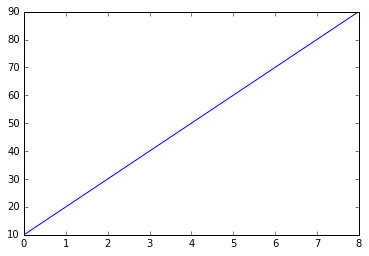

In [145]:
import matplotlib.pyplot as plt
%matplotlib inline
ts=pd.Series(np.arange(10,100,10))
ts.plot()

### DataFrame的可视化

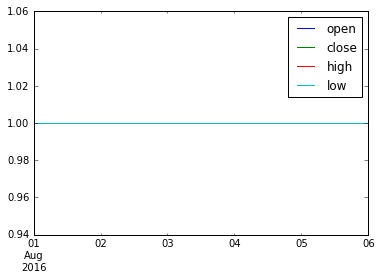

In [144]:
df.plot()

## 读写I/O

In [164]:
#df.to_csv('df.csv')
df.to_csv('df2.csv',date_format='%Y%m%d')

In [173]:
rdf=pd.read_csv('df.csv',index_col=0)

In [174]:
print rdf

            open  close  high  low
2016-08-01   1.0    1.0   1.0  1.0
2016-08-02   1.0    1.0   1.0  1.0
2016-08-03   1.0    1.0   1.0  1.0
2016-08-04   1.0    1.0   1.0  1.0
2016-08-05   1.0    1.0   1.0  1.0
2016-08-06   1.0    1.0   1.0  1.0


In [182]:
print rdf.index

Index([u'2016-08-01', u'2016-08-02', u'2016-08-03', u'2016-08-04',
       u'2016-08-05', u'2016-08-06'],
      dtype='object')


In [185]:
rdf.index=pd.to_datetime(rdf.index)
print rdf.index

DatetimeIndex(['2016-08-01', '2016-08-02', '2016-08-03', '2016-08-04',
               '2016-08-05', '2016-08-06'],
              dtype='datetime64[ns]', freq=None)


## 拷贝函数copy

In [209]:
df2=df.copy()
df2.iloc[1,1]=2
print df
print df2

            open  close  high  low
2016-08-01   1.0    1.0   1.0  1.0
2016-08-02   1.0    1.0   1.0  1.0
2016-08-03   1.0    1.0   1.0  1.0
2016-08-04   1.0    1.0   1.0  1.0
2016-08-05   1.0    1.0   1.0  1.0
2016-08-06   1.0    1.0   1.0  1.0
            open  close  high  low
2016-08-01   1.0    1.0   1.0  1.0
2016-08-02   1.0    2.0   1.0  1.0
2016-08-03   1.0    1.0   1.0  1.0
2016-08-04   1.0    1.0   1.0  1.0
2016-08-05   1.0    1.0   1.0  1.0
2016-08-06   1.0    1.0   1.0  1.0


## 增加行，合并数据

In [212]:
print df2
row=dict(open=2,close=3,high=4,low=1)
drow=pd.DataFrame(row,index=[pd.Timestamp('2016-09-01')])
print drow

            open  close  high  low
2016-08-01   1.0    1.0   1.0  1.0
2016-08-02   1.0    2.0   1.0  1.0
2016-08-03   1.0    1.0   1.0  1.0
2016-08-04   1.0    1.0   1.0  1.0
2016-08-05   1.0    1.0   1.0  1.0
2016-08-06   1.0    1.0   1.0  1.0
            close  high  low  open
2016-09-01      3     4    1     2


In [215]:
df2.append(drow)

,close,high,low,open
2016-08-01,1.0,1.0,1.0,1.0
2016-08-02,2.0,1.0,1.0,1.0
2016-08-03,1.0,1.0,1.0,1.0
2016-08-04,1.0,1.0,1.0,1.0
2016-08-05,1.0,1.0,1.0,1.0
2016-08-06,1.0,1.0,1.0,1.0
2016-09-01,3.0,4.0,1.0,2.0


In [216]:
df2.index.name='date'
df2

,open,close,high,low
date,,,,
2016-08-01,1.0,1.0,1.0,1.0
2016-08-02,1.0,2.0,1.0,1.0
2016-08-03,1.0,1.0,1.0,1.0
2016-08-04,1.0,1.0,1.0,1.0
2016-08-05,1.0,1.0,1.0,1.0
2016-08-06,1.0,1.0,1.0,1.0


In [228]:
row2=dict(open=2,close=3,high=4,low=1)
drow=pd.DataFrame(row2,index=[3])
df2=df2.append(drow)

In [229]:
df2

,close,high,low,open
2016-08-01 00:00:00,1.0,1.0,1.0,1.0
2016-08-02 00:00:00,2.0,1.0,1.0,1.0
2016-08-03 00:00:00,1.0,1.0,1.0,1.0
2016-08-04 00:00:00,1.0,1.0,1.0,1.0
2016-08-05 00:00:00,1.0,1.0,1.0,1.0
2016-08-06 00:00:00,1.0,1.0,1.0,1.0
3,3.0,4.0,1.0,2.0


In [230]:
df2

,close,high,low,open
2016-08-01 00:00:00,1.0,1.0,1.0,1.0
2016-08-02 00:00:00,2.0,1.0,1.0,1.0
2016-08-03 00:00:00,1.0,1.0,1.0,1.0
2016-08-04 00:00:00,1.0,1.0,1.0,1.0
2016-08-05 00:00:00,1.0,1.0,1.0,1.0
2016-08-06 00:00:00,1.0,1.0,1.0,1.0
3,3.0,4.0,1.0,2.0


In [231]:
df2.close

2016-08-01 00:00:00    1.0
2016-08-02 00:00:00    2.0
2016-08-03 00:00:00    1.0
2016-08-04 00:00:00    1.0
2016-08-05 00:00:00    1.0
2016-08-06 00:00:00    1.0
3                      3.0
Name: close, dtype: float64

In [232]:
df2.close==3

2016-08-01 00:00:00    False
2016-08-02 00:00:00    False
2016-08-03 00:00:00    False
2016-08-04 00:00:00    False
2016-08-05 00:00:00    False
2016-08-06 00:00:00    False
3                       True
Name: close, dtype: bool

In [239]:
x=df2[df2.close==1][]

In [242]:
print df

            open  close  high  low
2016-08-01   1.0    1.0   1.0  1.0
2016-08-02   1.0    1.0   1.0  1.0
2016-08-03   1.0    1.0   1.0  1.0
2016-08-04   1.0    1.0   1.0  1.0
2016-08-05   1.0    1.0   1.0  1.0
2016-08-06   1.0    1.0   1.0  1.0


In [243]:
print df[0:]

            open  close  high  low
2016-08-01   1.0    1.0   1.0  1.0
2016-08-02   1.0    1.0   1.0  1.0
2016-08-03   1.0    1.0   1.0  1.0
2016-08-04   1.0    1.0   1.0  1.0
2016-08-05   1.0    1.0   1.0  1.0
2016-08-06   1.0    1.0   1.0  1.0


In [245]:
print df[1:]

            open  close  high  low
2016-08-02   1.0    1.0   1.0  1.0
2016-08-03   1.0    1.0   1.0  1.0
2016-08-04   1.0    1.0   1.0  1.0
2016-08-05   1.0    1.0   1.0  1.0
2016-08-06   1.0    1.0   1.0  1.0
